In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('C:/Users/work12/Desktop/AI Genie/New folder/diabetes.csv', skiprows=[0], header=None, names=col_names)

# df = pd.read_csv('C:/Users/work12/Desktop/AI Genie/iris.csv')

In [4]:
pima.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
# split X and y into training and testing sets
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [12]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [13]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

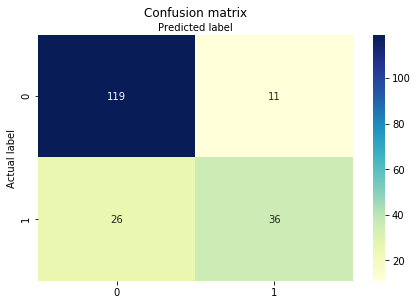

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


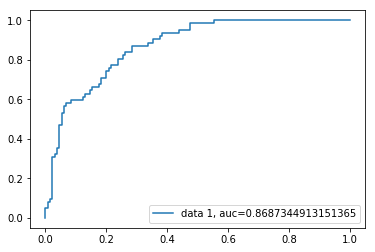

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba

array([ 0.88440074,  0.20989071,  0.1563645 ,  0.59805378,  0.1819074 ,
        0.07672381,  0.68229778,  0.7427673 ,  0.45106862,  0.37011284,
        0.54730293,  0.89903632,  0.31265642,  0.25214503,  0.17090344,
        0.20103372,  0.78624203,  0.06933176,  0.36319259,  0.31122945,
        0.55114582,  0.39568972,  0.3402706 ,  0.09154665,  0.1082002 ,
        0.36245116,  0.09064659,  0.83048193,  0.16826337,  0.21237799,
        0.45972897,  0.26575975,  0.13752873,  0.46131854,  0.17521525,
        0.65426588,  0.45366877,  0.13173979,  0.36113313,  0.67562372,
        0.31867481,  0.24866528,  0.23346304,  0.73214681,  0.71045964,
        0.02981112,  0.14414285,  0.26687773,  0.36892603,  0.32648445,
        0.44663933,  0.25481251,  0.81737883,  0.42573536,  0.18933278,
        0.01264923,  0.10314603,  0.45805215,  0.32132488,  0.2276384 ,
        0.61361992,  0.48612895,  0.17014207,  0.72709023,  0.62696423,
        0.84345224,  0.63855135,  0.19451383,  0.41797683,  0.15